In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler


In [132]:
data=pd.read_csv('first inten project.csv')

In [133]:
data.shape

(23475, 17)

In [134]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0.0,0.0,0.0,88.00,0.0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0.0,0.0,0.0,106.68,1.0,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0.0,0.0,0.0,50.00,0.0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0.0,0.0,0.0,100.00,1.0,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0.0,0.0,0.0,77.00,0.0,4/11/2018,Canceled


In [135]:
for col in data.columns:
    # Check for whitespace, empty values, and data type
    if data[col].dtype == 'object': # Check if the column is of type object (string)
        has_whitespace = data[col].str.contains(r'^\s+|\s+$').any()
    else:
        has_whitespace = False
    has_empty_values = data[col].isnull().any()
    data_type = data[col].dtype

    # Print results
    if has_whitespace or has_empty_values:
        print(f"Column '{col}':")
        if has_whitespace:
              print("  - Contains leading or trailing whitespace")
        if has_empty_values:
            print("  - Contains empty values")
        print("  - Data type:", data_type)

Column 'repeated':
  - Contains empty values
  - Data type: float64
Column 'P-C':
  - Contains empty values
  - Data type: float64
Column 'P-not-C':
  - Contains empty values
  - Data type: float64
Column 'average price ':
  - Contains empty values
  - Data type: float64
Column 'special requests':
  - Contains empty values
  - Data type: float64
Column 'date of reservation':
  - Contains empty values
  - Data type: object
Column 'booking status':
  - Contains empty values
  - Data type: object


In [136]:
for col in data.columns:
    if data[col].dtype == 'object': # Check if the column is of object type
        data[col] = data[col].str.strip()  # Apply strip only if it's a string column

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23475 entries, 0 to 23474
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                23475 non-null  object 
 1   number of adults          23475 non-null  int64  
 2   number of children        23475 non-null  int64  
 3   number of weekend nights  23475 non-null  int64  
 4   number of week nights     23475 non-null  int64  
 5   type of meal              23475 non-null  object 
 6   car parking space         23475 non-null  int64  
 7   room type                 23475 non-null  object 
 8   lead time                 23475 non-null  int64  
 9   market segment type       23475 non-null  object 
 10  repeated                  23474 non-null  float64
 11  P-C                       23474 non-null  float64
 12  P-not-C                   23474 non-null  float64
 13  average price             23474 non-null  float64
 14  specia

In [138]:
data.isnull().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


In [139]:
data['repeated']=data['repeated'].fillna(data['repeated'].mean())
data['P-C']=data['P-C'].fillna(data['P-C'].mean())
data['P-not-C']=data['P-not-C'].fillna(data['P-not-C'].mean())
data['booking status']=data['booking status'].fillna(data['booking status'].mode())

In [140]:
outlier_features =  data.drop(['type of meal','room type','market segment type','booking status','Booking_ID','date of reservation'],axis = 1)


In [141]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame
Q1 = outlier_features.quantile(0.25)
Q3 = outlier_features.quantile(0.75)
IQR = Q3 - Q1

# Using IQR to detect outliers
outliers_iqr = data[(outlier_features < Q1 - 1.5 * IQR) | (outlier_features > Q3 + 1.5 * IQR)]

# Using Z-score to detect outliers
mean = outlier_features.mean()
std = outlier_features.std()
z_scores = (outlier_features- mean) / std
threshold = 3
outliers_zscore = data[abs(z_scores) > threshold]

# Handling outliers (e.g., removing)
data_cleaned = data[~data.index.isin(outliers_iqr.index)]  # Remove outliers detected by IQR

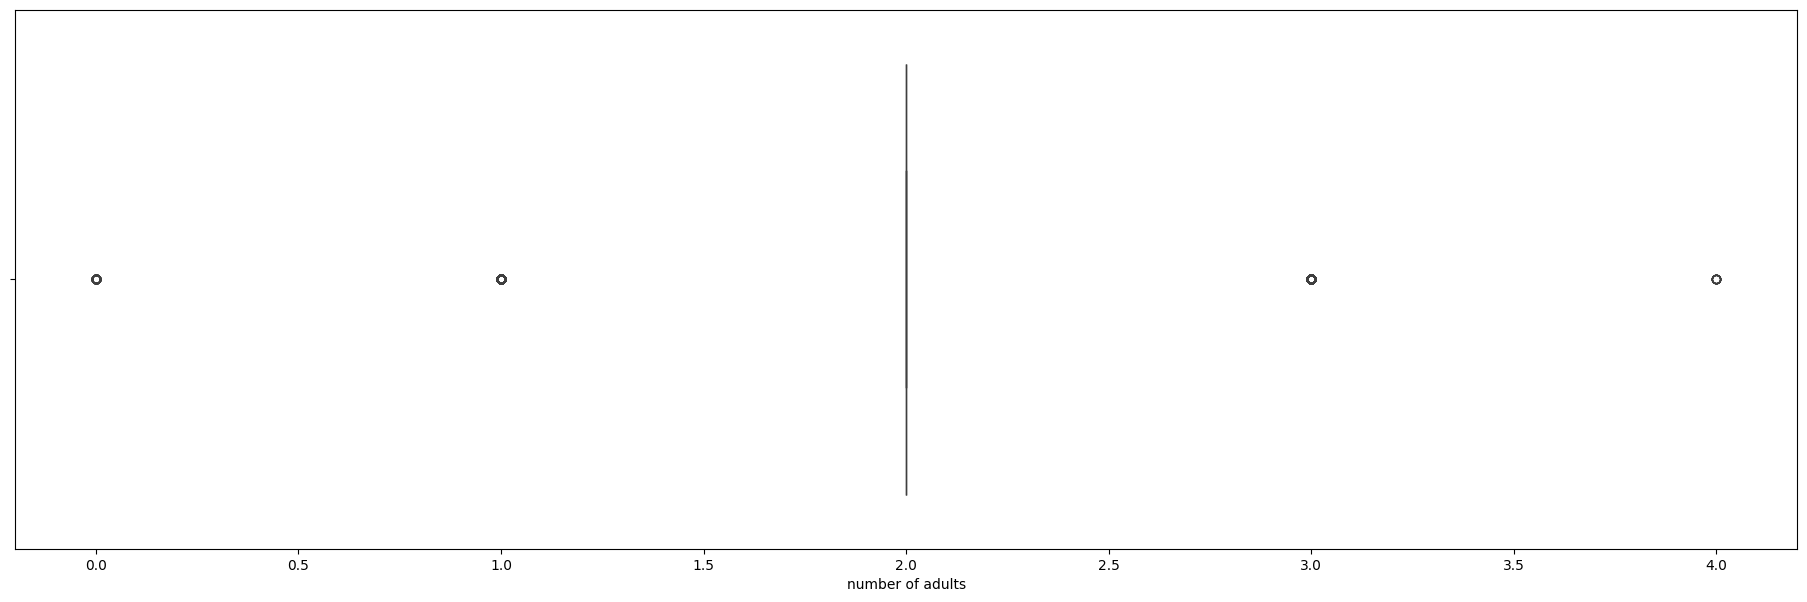

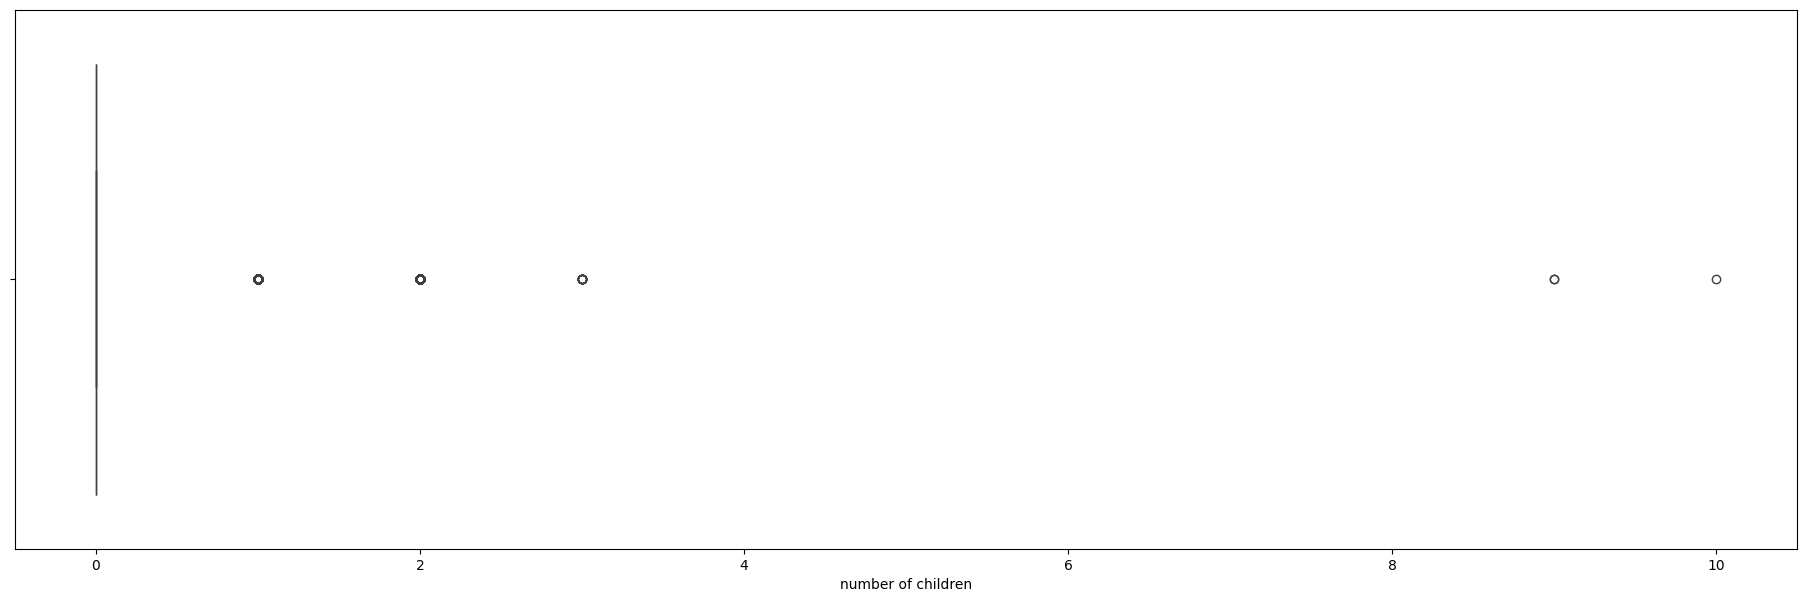

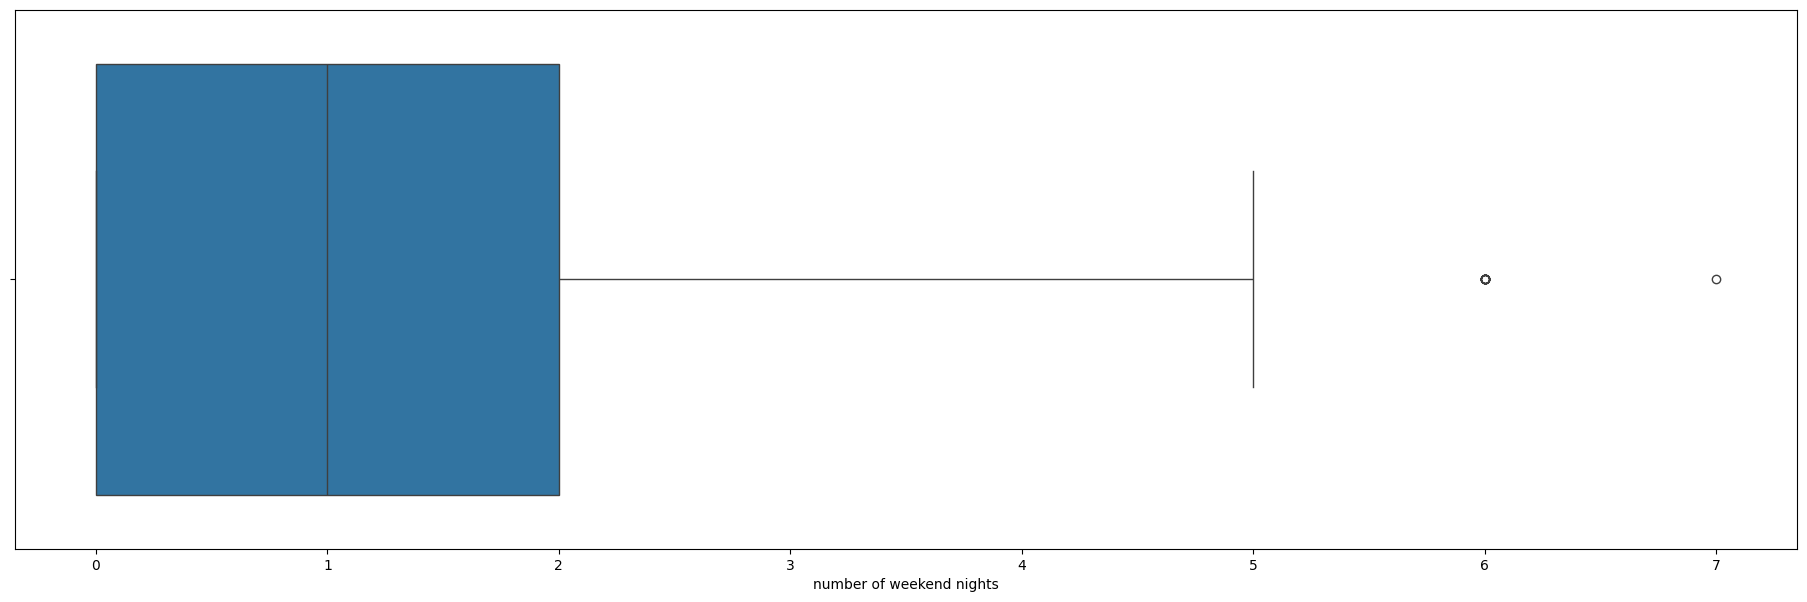

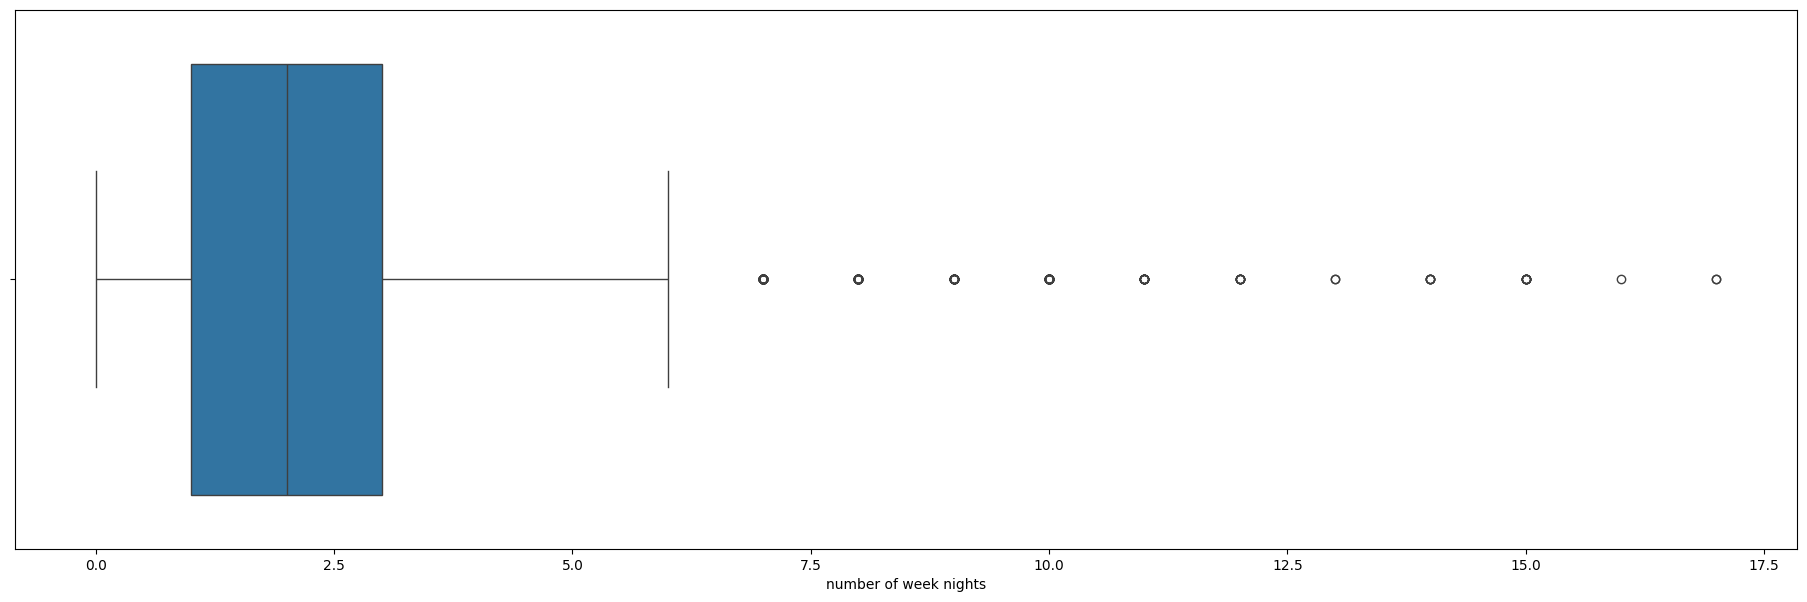

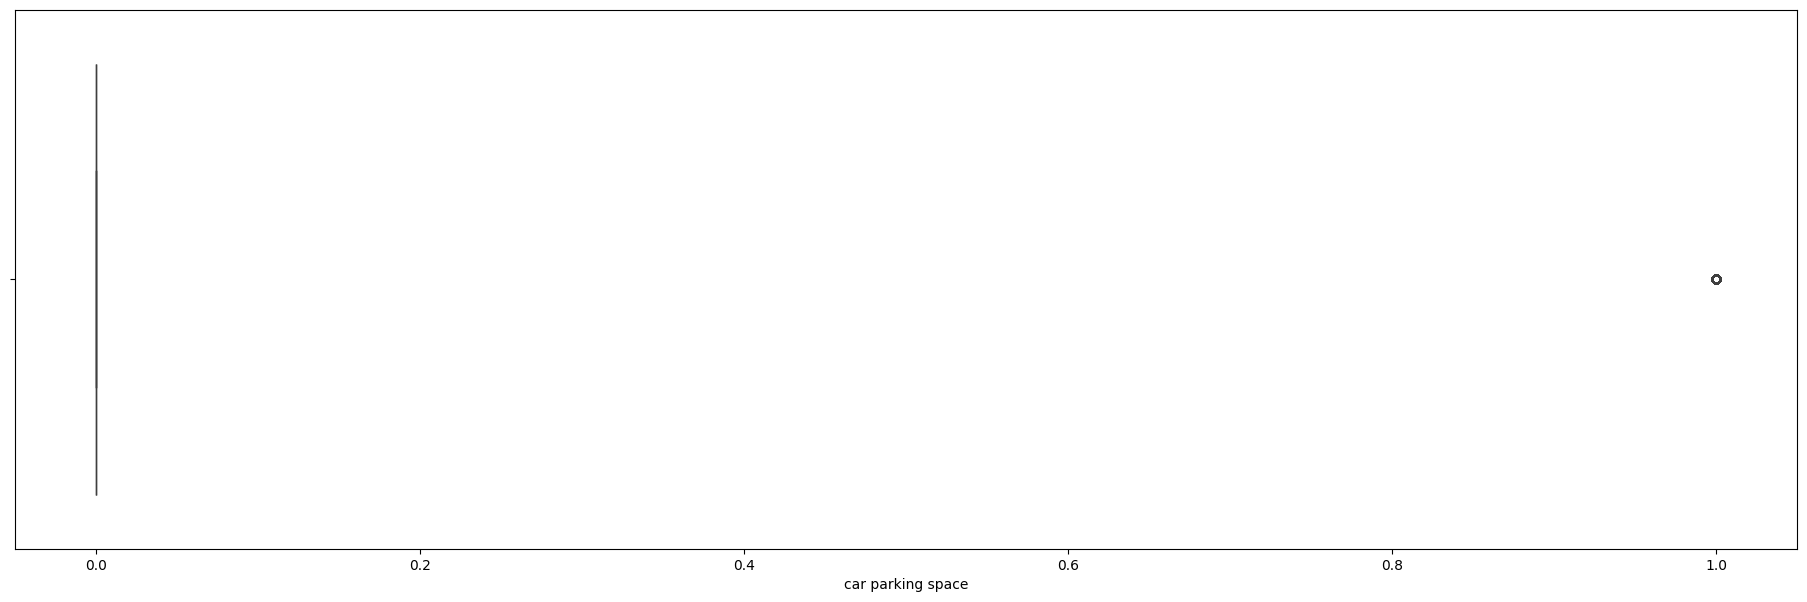

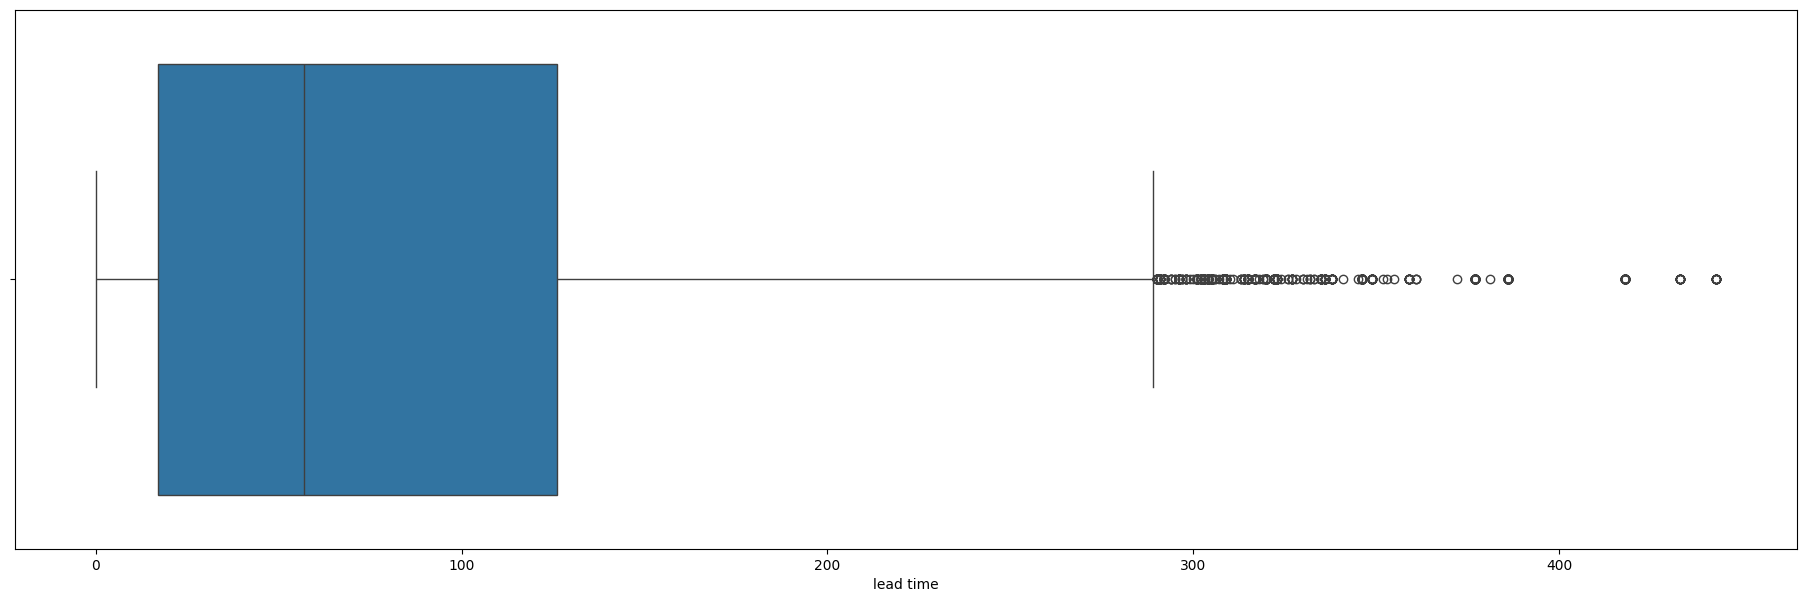

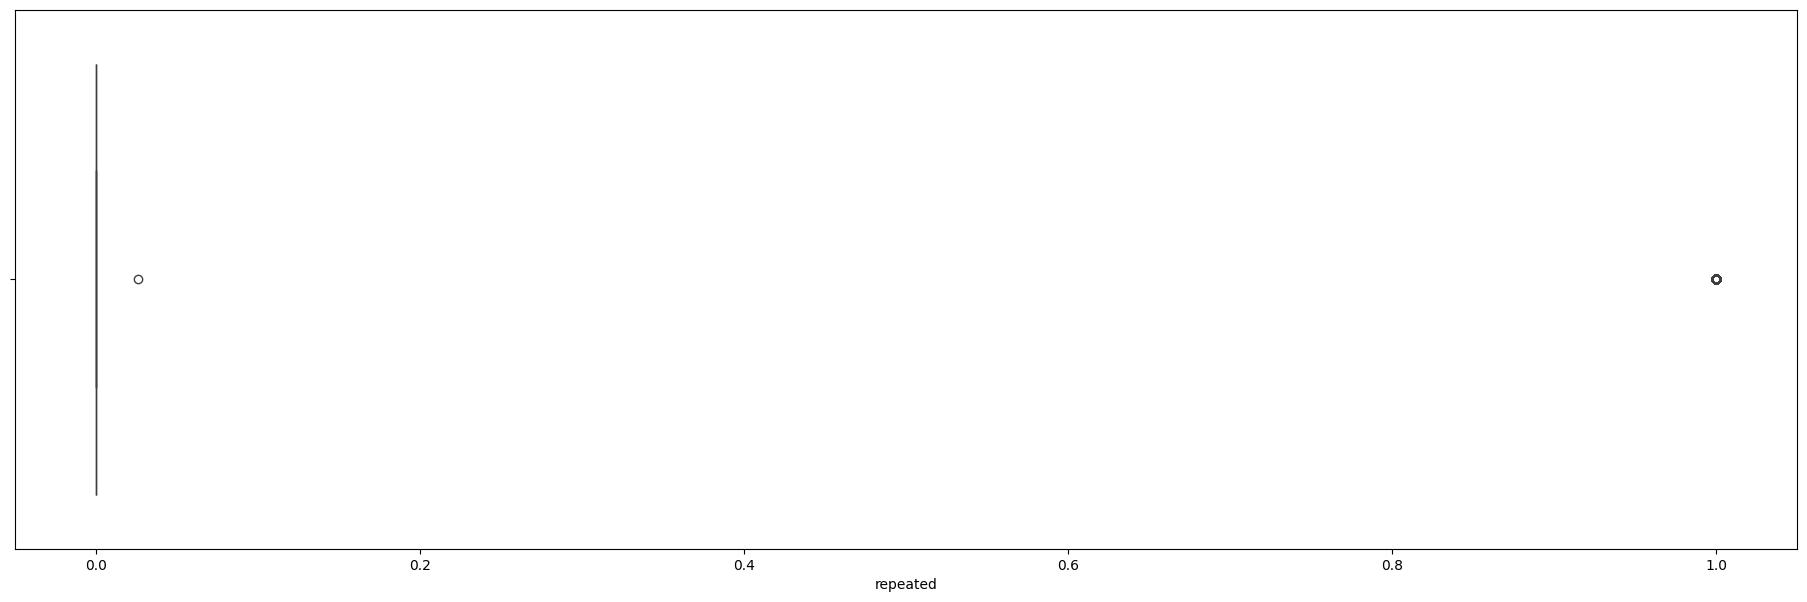

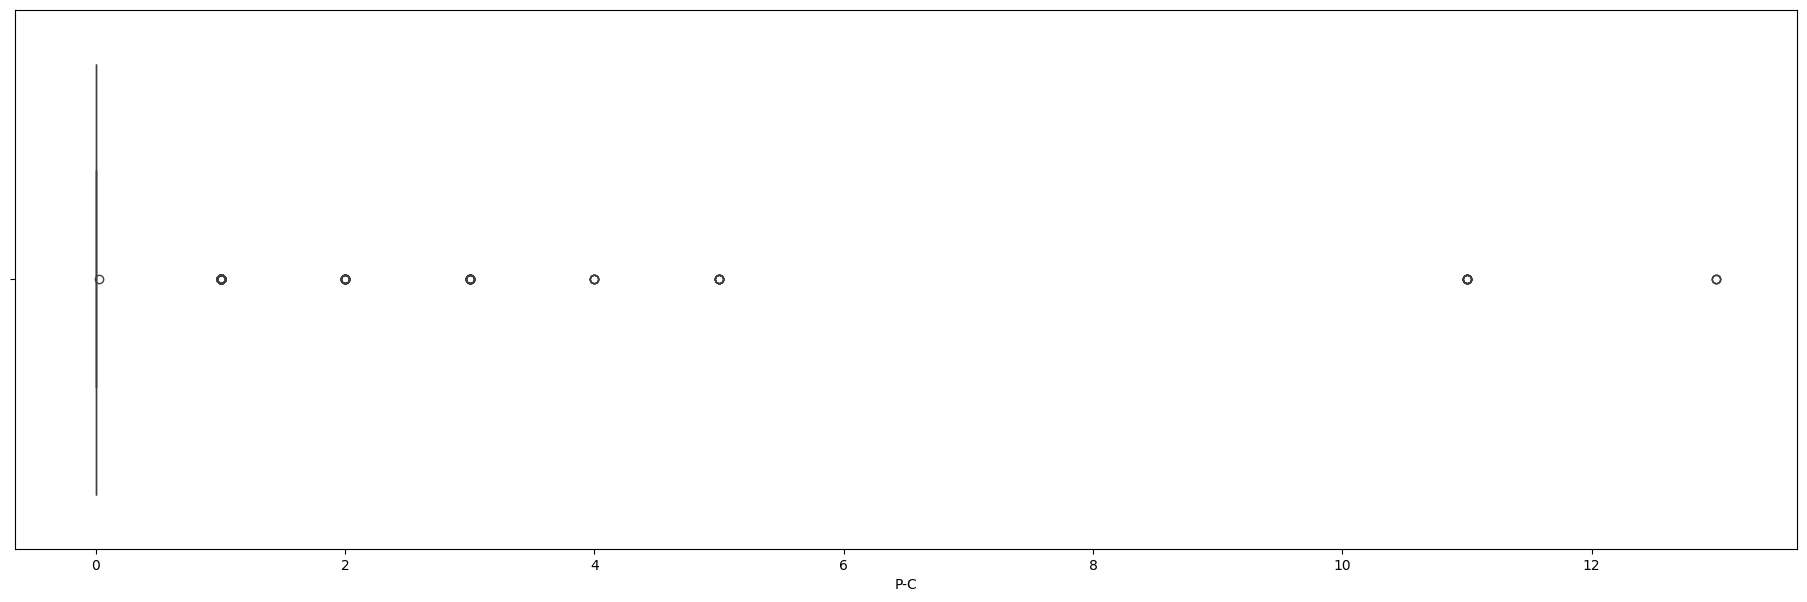

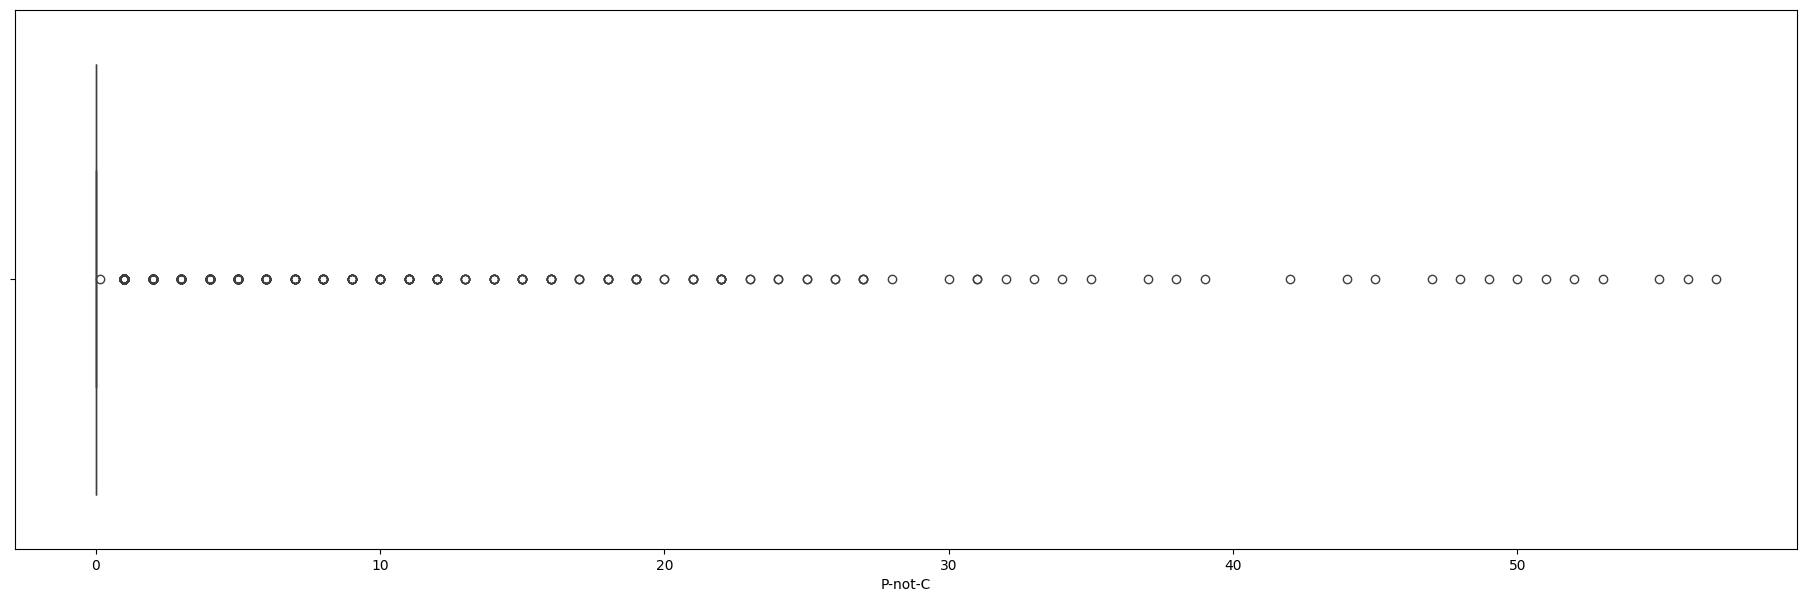

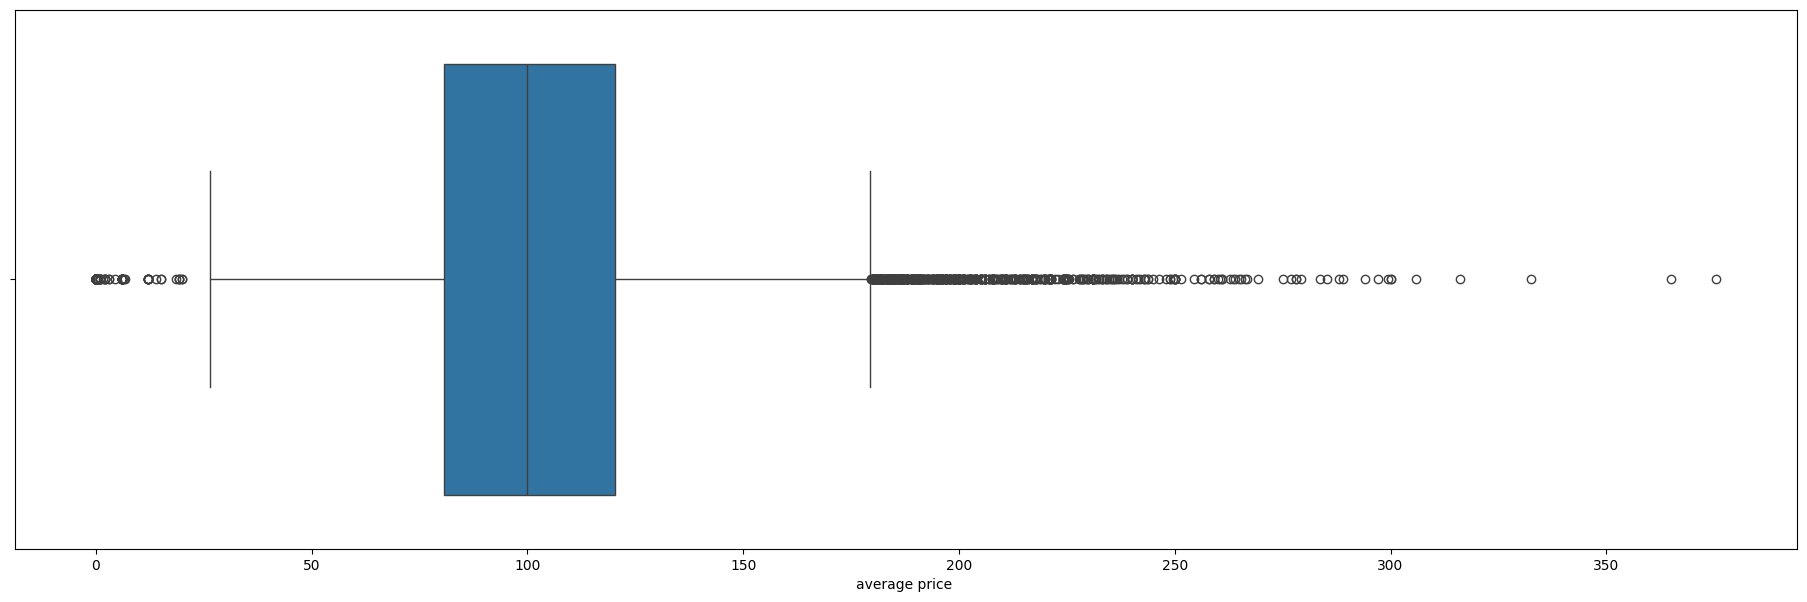

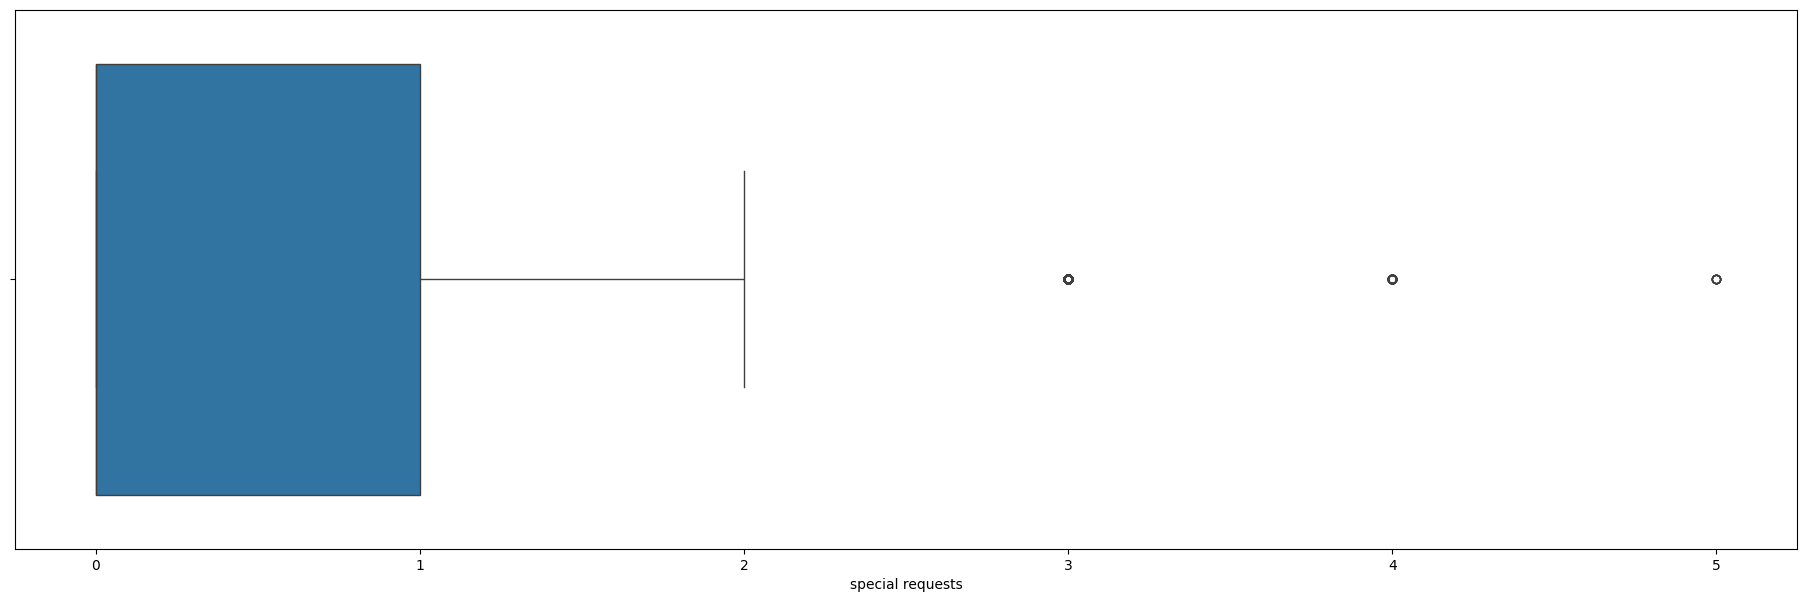

In [142]:
for feature in outlier_features:
    plt.figure(figsize=(23, 7))
    sns.boxplot(x=data[feature])

In [143]:
data['booking status']=data['booking status'].map({'Not_Canceled':0,'Canceled':1})
data['room type']=data['room type'].map({'Room_Type 1':0,'Room_Type 2':1,'Room_Type 3':2,'Room_Type 4':3,'Room_Type 5':4,'Room_Type 6':5,'Room_Type 7':6})
data['type of meal']=data['type of meal'].map({'Not Selected':0,'Meal Plan 1':1,'Meal Plan 2':2,'Meal Plan 3':3})
data['market segment type']=data['market segment type'].map({'Offline':0,'Online':1})


In [144]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,1,0,0,224,0.0,0.0,0.0,0.0,88.00,0.0,10/2/2015,0.0
1,INN00002,1,0,1,3,0,0,0,5,1.0,0.0,0.0,0.0,106.68,1.0,11/6/2018,0.0
2,INN00003,2,1,1,3,1,0,0,1,1.0,0.0,0.0,0.0,50.00,0.0,2/28/2018,1.0
3,INN00004,1,0,0,2,1,0,0,211,1.0,0.0,0.0,0.0,100.00,1.0,5/20/2017,1.0
4,INN00005,1,0,1,2,0,0,0,48,1.0,0.0,0.0,0.0,77.00,0.0,4/11/2018,1.0


In [145]:
data = data.drop(['Booking_ID','date of reservation'],axis=1)



In [146]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

In [149]:
x=scaled_df.drop(['booking status','market segment type','special requests'],axis=1)
y=scaled_df['booking status']
x = x.dropna()  # Remove rows with NaN in x
y = y[x.index]  # Update y to match the rows in x after dropping NaN values
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=0)

In [150]:
knn_model=  KNeighborsRegressor(n_neighbors=4)
knn_model.fit(x_train,y_train)

y_pred = knn_model.predict(x_test)

In [152]:
# Import the necessary libraries
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.15381666382688702
R-squared: 0.3008409652761448
